# CLASSIFICATION

### IMPORTING LIBRARIES

In [87]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

# DATA READING

In [2]:
df=pd.read_csv(r"C:\Users\Admin\MLP\DATA\Data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth',
       'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'weatherCode', 'pressure', 'cloudcover', 'tempF',
       'WindChillF', 'time', 'precipMM', 'DewPointF', 'humidity',
       'windspeedKmph', 'visibility', 'WindGustKmph', 'winddirDegree', 'date',
       'airport'],
      dtype='object')

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,...,time,precipMM,DewPointF,humidity,windspeedKmph,visibility,WindGustKmph,winddirDegree,date,airport
0,2016-01-01,1,2016,1,1,741.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
1,2016-01-01,1,2016,1,1,759.0,1.0,800,35.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
2,2016-01-01,1,2016,1,1,705.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
3,2016-01-01,1,2016,1,1,754.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
4,2016-01-01,1,2016,1,1,740.0,0.0,800,2.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA


In [6]:
df.describe()

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,...,tempF,WindChillF,time,precipMM,DewPointF,humidity,windspeedKmph,visibility,WindGustKmph,winddirDegree
count,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,...,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06
mean,2.515180e+00,2.016494e+03,6.544073e+00,1.576746e+01,1.328582e+03,2.009678e-01,1.349253e+03,1.403783e+01,1.273775e+04,1.273823e+04,...,6.550408e+01,6.413533e+01,1.349253e+03,2.594639e-01,4.938856e+01,6.301537e+01,1.237799e+01,9.448645e+00,1.669092e+01,1.869656e+02
std,1.104736e+00,4.999633e-01,3.396908e+00,8.790680e+00,5.270672e+02,4.007241e-01,5.275546e+02,4.152727e+01,1.354932e+03,1.354563e+03,...,1.712732e+01,1.901423e+01,5.275546e+02,9.899061e-01,1.614474e+01,2.239902e+01,6.492754e+00,1.803303e+00,8.992956e+00,8.670388e+01
min,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.039700e+04,1.039700e+04,...,-1.000000e+01,-2.500000e+01,0.000000e+00,0.000000e+00,-1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00,9.060000e+02,0.000000e+00,9.000000e+02,0.000000e+00,1.129800e+04,1.129800e+04,...,5.500000e+01,5.400000e+01,9.000000e+02,0.000000e+00,3.800000e+01,4.800000e+01,7.000000e+00,1.000000e+01,1.000000e+01,1.210000e+02
50%,3.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,1.322000e+03,0.000000e+00,1.300000e+03,0.000000e+00,1.289200e+04,1.289200e+04,...,6.600000e+01,6.600000e+01,1.300000e+03,0.000000e+00,5.100000e+01,6.700000e+01,1.100000e+01,1.000000e+01,1.500000e+01,1.950000e+02
75%,3.000000e+00,2.017000e+03,9.000000e+00,2.300000e+01,1.747000e+03,0.000000e+00,1.800000e+03,9.000000e+00,1.393000e+04,1.393000e+04,...,7.800000e+01,7.800000e+01,1.800000e+03,1.000000e-01,6.200000e+01,8.100000e+01,1.600000e+01,1.000000e+01,2.100000e+01,2.540000e+02
max,4.000000e+00,2.017000e+03,1.200000e+01,3.100000e+01,2.400000e+03,1.000000e+00,2.300000e+03,2.149000e+03,1.477100e+04,1.477100e+04,...,1.210000e+02,1.210000e+02,2.300000e+03,3.050000e+01,8.200000e+01,1.000000e+02,5.900000e+01,2.000000e+01,8.200000e+01,3.600000e+02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851436 entries, 0 to 1851435
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlightDate       object 
 1   Quarter          int64  
 2   Year             int64  
 3   Month            int64  
 4   DayofMonth       int64  
 5   DepTime          float64
 6   DepDel15         float64
 7   CRSDepTime       int64  
 8   DepDelayMinutes  float64
 9   OriginAirportID  int64  
 10  DestAirportID    int64  
 11  ArrTime          float64
 12  CRSArrTime       int64  
 13  ArrDel15         float64
 14  ArrDelayMinutes  float64
 15  weatherCode      int64  
 16  pressure         int64  
 17  cloudcover       int64  
 18  tempF            int64  
 19  WindChillF       int64  
 20  time             int64  
 21  precipMM         float64
 22  DewPointF        int64  
 23  humidity         int64  
 24  windspeedKmph    int64  
 25  visibility       int64  
 26  WindGustKmph     int64  
 27  winddirDegre

# Feature Engineering

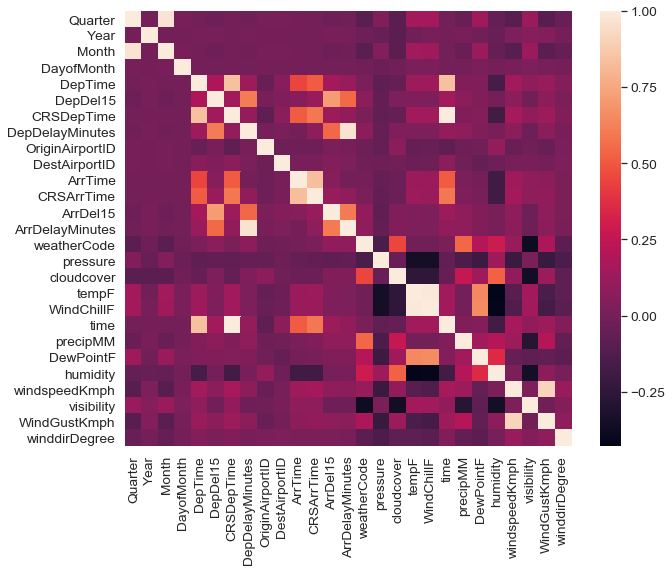

In [92]:
sns.heatmap(df.corr())

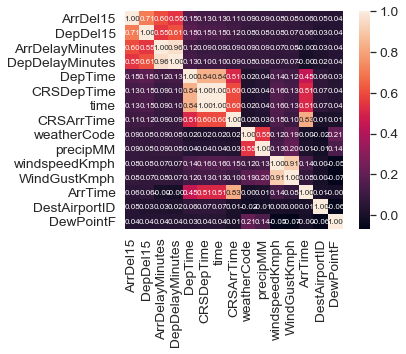

In [85]:
comat=df.corr()
k=15
col=comat.nlargest(k,'ArrDel15')['ArrDel15'].index
cm=np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True,cbar=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [10]:
hm=(comat['ArrDel15'].sort_values(ascending=False)[:15])
print(hm)

ArrDel15           1.000000
DepDel15           0.710530
ArrDelayMinutes    0.603641
DepDelayMinutes    0.546150
DepTime            0.154321
time               0.126027
CRSDepTime         0.126027
CRSArrTime         0.110599
weatherCode        0.091528
precipMM           0.088244
windspeedKmph      0.083018
WindGustKmph       0.081273
ArrTime            0.055535
DestAirportID      0.048171
DewPointF          0.038163
Name: ArrDel15, dtype: float64


In [11]:
true_count=len(df.loc[df['ArrDel15']==True])
false_count=len(df.loc[df['ArrDel15']==False])

In [12]:
print("True value {1}:",true_count,"False value {0}:",false_count)

True value {1}: 388058 False value {0}: 1463378


In [ ]:
features=['DepDel15','WindGustKmph','DepDelayMinutes','DepTime','time','CRSDepTime','windspeedKmph','weatherCode',        
'precipMM','WindGustKmph','DestAirportID','DewPointF']
prediction=['ArrDel15']

In [19]:
X=df[features].values
y=df[prediction].values

# Train,Test Split & Sampling

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [45]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
nm=NearMiss()
ros=RandomOverSampler()
smt=SMOTETomek()
x_nm,y_nm=nm.fit_sample(X_train,y_train)
x_ros,y_ros=ros.fit_sample(X_train,y_train)
x_smt,y_smt=smt.fit_sample(X_train,y_train)

In [46]:
print("NearMiss:",x_nm.shape,y_nm.shape)
print("RandomOverSampler:",x_ros.shape,y_ros.shape)
print("SMOTETomek:",x_smt.shape,y_smt.shape)

NearMiss: (543506, 12) (543506,)
RandomOverSampler: (2048504, 12) (2048504,)
SMOTETomek: (2010674, 12) (2010674,)


# Classifiers:


### 1.Logistic Regression

In [55]:
lr=LogisticRegression()
lr1=LogisticRegression()
lr2=LogisticRegression()

In [56]:
lr.fit(x_nm,y_nm)
lr1.fit(x_ros,y_ros)
lr2.fit(x_smt,y_smt)
p=lr.predict(X_test)
p1=lr1.predict(X_test)
p2=lr2.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### 2.Desicion Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC1=DecisionTreeClassifier()
DTC2=DecisionTreeClassifier()
DTC.fit(x_nm,y_nm)
DTC1.fit(x_ros,y_ros)
DTC2.fit(x_smt,y_smt)
pr=DTC.predict(X_test)
pr1=DTC1.predict(X_test)
pr2=DTC2.predict(X_test)

### 3.Extra Tree Classifier

In [81]:
ETC=ExtraTreesClassifier()
ETC1=ExtraTreesClassifier()
ETC2=ExtraTreesClassifier()
ETC.fit(x_nm,y_nm)
ETC1.fit(x_ros,y_ros)
ETC2.fit(x_smt,y_smt)
pre=ETC.predict(X_test)
pre1=ETC1.predict(X_test)
pre2=ETC2.predict(X_test)

### 4.XGBOOST

In [75]:
XGB=XGBClassifier()
XGB1=XGBClassifier()
XGB2=XGBClassifier()
XGB.fit(x_nm,y_nm)
XGB1.fit(x_ros,y_ros)
XGB2.fit(x_smt,y_smt)
pred=XGB.predict(X_test)
pred1=XGB1.predict(X_test)
pred2=XGB2.predict(X_test)

## SAMPLED DATA SCORES:

### UnderSampling

#### ACCURACY

In [82]:
print("LogisticRegression ACCURACY:",metrics.accuracy_score(y_test,p))
print("DecisionTreeClassifier ACCURACY:",metrics.accuracy_score(y_test,pr))
print("ExtraTreeClassifier ACCURACY:",metrics.accuracy_score(y_test,pre))
print("XGBClassifier ACCURACY:",metrics.accuracy_score(y_test,pred))

LogisticRegression ACCURACY: 0.7865531452151573
DecisionTreeClassifier ACCURACY: 0.6136063705482769
ExtraTreeClassifier ACCURACY: 0.6743591913306963
XGBClassifier ACCURACY: 0.6716495838366962


#### ROC_ AUC - Higher the auc better the model is 

In [88]:
print("LogisticRegression ACCURACY:",metrics.roc_auc_score(y_test,p))
print("DecisionTreeClassifier ACCURACY:",metrics.roc_auc_score(y_test,pr))
print("ExtraTreeClassifier ACCURACY:",metrics.roc_auc_score(y_test,pre))
print("XGBClassifier ACCURACY:",metrics.roc_auc_score(y_test,pred))

LogisticRegression ACCURACY: 0.8020484637768748
DecisionTreeClassifier ACCURACY: 0.7042834798720954
ExtraTreeClassifier ACCURACY: 0.7468928051708579
XGBClassifier ACCURACY: 0.7435420785396262


#### CLASSIFICATION_REPORT

In [99]:
print("LogisticRegression:\n",metrics.classification_report(y_test,p))
print("DecisionTreeClassifier:\n",metrics.classification_report(y_test,pr))
print("ExtraTreeClassifier:\n",metrics.classification_report(y_test,pre))
print("XGBClassifier:\n",metrics.classification_report(y_test,pred))

LogisticRegression:
               precision    recall  f1-score   support

         0.0       0.94      0.78      0.85    439126
         1.0       0.49      0.83      0.62    116305

    accuracy                           0.79    555431
   macro avg       0.72      0.80      0.74    555431
weighted avg       0.85      0.79      0.80    555431

DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.94      0.55      0.69    439126
         1.0       0.34      0.86      0.48    116305

    accuracy                           0.61    555431
   macro avg       0.64      0.70      0.59    555431
weighted avg       0.81      0.61      0.65    555431

ExtraTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.95      0.62      0.75    439126
         1.0       0.38      0.87      0.53    116305

    accuracy                           0.67    555431
   macro avg       0.66      0.75      0.64    555431
weight

#### OverSampling

In [101]:
print("LogisticRegression:",metrics.accuracy_score(y_test,p1))
print("DecisionTreeClassifier:",metrics.accuracy_score(y_test,pr1))
print("ExtraTreeClassifier:",metrics.accuracy_score(y1_test,pre1))
print("XGBClassifier:",metrics.accuracy_score(y_test,pred1))

LogisticRegression: 0.8938752068213693
DecisionTreeClassifier: 0.8635636109615776
ExtraTreeClassifier: 0.9099312065765145
XGBClassifier: 0.8937347753366305


#### ROC_ AUC - Higher the auc better the model is 

In [89]:
print("LogisticRegression ACCURACY:",metrics.roc_auc_score(y_test,p1))
print("DecisionTreeClassifier ACCURACY:",metrics.roc_auc_score(y_test,pr1))
print("ExtraTreeClassifier ACCURACY:",metrics.roc_auc_score(y_test,pre1))
print("XGBClassifier ACCURACY:",metrics.roc_auc_score(y_test,pred1))

LogisticRegression ACCURACY: 0.8504126738284112
DecisionTreeClassifier ACCURACY: 0.797391561984142
ExtraTreeClassifier ACCURACY: 0.8320062558212498
XGBClassifier ACCURACY: 0.855102409971861


#### CLASSIFICATION REPORT

In [102]:
print("LogisticRegression:\n",metrics.classification_report(y_test,p1))
print("DecisionTreeClassifier:\n",metrics.classification_report(y_test,pr1))
print("ExtraTreeClassifier:\n",metrics.classification_report(y_test,pre1))
print("XGBClassifier:\n",metrics.classification_report(y_test,pred1))

LogisticRegression:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    439126
         1.0       0.73      0.78      0.75    116305

    accuracy                           0.89    555431
   macro avg       0.84      0.85      0.84    555431
weighted avg       0.90      0.89      0.89    555431

DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    439126
         1.0       0.67      0.68      0.68    116305

    accuracy                           0.86    555431
   macro avg       0.79      0.80      0.80    555431
weighted avg       0.86      0.86      0.86    555431

ExtraTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    439126
         1.0       0.84      0.70      0.76    116305

    accuracy                           0.91    555431
   macro avg       0.88      0.83      0.85    555431
weight

#### UnderSampling & OverSampling

#### ACCURACY

In [84]:
print("LogisticRegression ACCURACY:",metrics.accuracy_score(y_test,p2))
print("DecisionTreeClassifier ACCURACY:",metrics.accuracy_score(y_test,pr2))
print("ExtraTreeClassifier ACCURACY:",metrics.accuracy_score(y_test,pre2))
print("XGBClassifier ACCURACY:",metrics.accuracy_score(y_test,pred2))

LogisticRegression ACCURACY: 0.8941812754419541
DecisionTreeClassifier ACCURACY: 0.8622655199295682
ExtraTreeClassifier ACCURACY: 0.9074412483278751
XGBClassifier ACCURACY: 0.9162470225824629


#### ROC_AUC

In [90]:
print("LogisticRegression ACCURACY:",metrics.roc_auc_score(y_test,p2))
print("DecisionTreeClassifier ACCURACY:",metrics.roc_auc_score(y_test,pr2))
print("ExtraTreeClassifier ACCURACY:",metrics.roc_auc_score(y_test,pre2))
print("XGBClassifier ACCURACY:",metrics.roc_auc_score(y_test,pred2))

LogisticRegression ACCURACY: 0.8504166151824704
DecisionTreeClassifier ACCURACY: 0.7992759291554324
ExtraTreeClassifier ACCURACY: 0.8418058739641814
XGBClassifier ACCURACY: 0.8329444313584954


#### CLASSIFICATION REPORT

In [104]:
print("LogisticRegression:\n",metrics.classification_report(y_test,p2))
print("DecisionTreeClassifier:\n",metrics.classification_report(y_test,pr2))
print("ExtraTreeClassifier:\n",metrics.classification_report(y_test,pre2))
print("XGBClassifier:\n",metrics.classification_report(y_test,pred2))

LogisticRegression:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    439126
         1.0       0.73      0.78      0.75    116305

    accuracy                           0.89    555431
   macro avg       0.84      0.85      0.84    555431
weighted avg       0.90      0.89      0.90    555431

DecisionTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    439126
         1.0       0.66      0.69      0.68    116305

    accuracy                           0.86    555431
   macro avg       0.79      0.80      0.79    555431
weighted avg       0.86      0.86      0.86    555431

ExtraTreeClassifier:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    439126
         1.0       0.81      0.73      0.77    116305

    accuracy                           0.91    555431
   macro avg       0.87      0.84      0.85    555431
weight